# Fighters Analysis

In [23]:
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
scripts_path = os.path.join(parent_dir, "scripts")

if scripts_path not in sys.path:
  sys.path.insert(0, scripts_path)

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helpers import base_path

In [25]:
fighters_df = pd.read_csv(base_path('data/Fighters.csv'))

Who are the current belt holders ?

In [26]:
events_df = pd.read_csv(base_path('data/Events.csv'),parse_dates=['Date'])

In [27]:
champs = fighters_df[fighters_df['Belt']]

In [28]:
print("The current UFC champions are :")
for champ in champs['Full Name'].tolist() :
    print(f'- {champ}')

The current UFC champions are :
- Magomed Ankalaev
- Tom Aspinall
- Khamzat Chimaev
- Jack Della Maddalena
- Merab Dvalishvili
- Kayla Harrison
- Alexandre Pantoja
- Valentina Shevchenko
- Ilia Topuria
- Alexander Volkanovski
- Zhang Weili


What is the most common stance between fighters ? champions ?

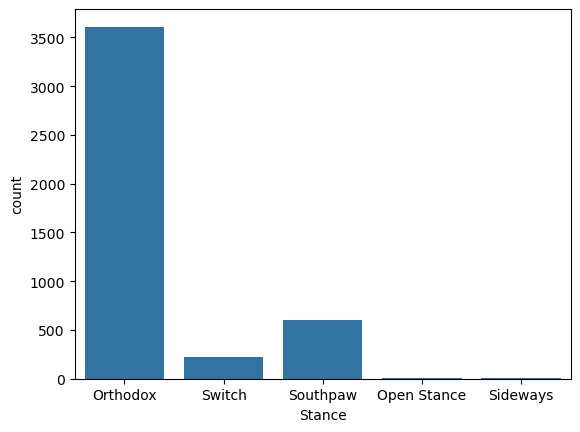

In [29]:
sns.countplot(data=fighters_df,x='Stance')
plt.show()

Fighters are most likely to have an Orthodox Stance

Which fighter(s) has the longest Reach ever ?

In [30]:
fighters_df[fighters_df['Reach'] == fighters_df['Reach'].max()]

,Full Name,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
936,Robelis Despaigne,The Big Boy,6.70,265.0,84.0,Orthodox,5,2,0,False
1887,Jon Jones,Bones,6.40,248.0,84.0,Orthodox,28,1,0,False
3036,Sergei Pavlovich,No Nickname,6.30,257.0,84.0,Southpaw,20,3,0,False
3880,Stefan Struve,Skyscraper,6.11,265.0,84.0,Orthodox,33,13,0,False


Height Vs Weight

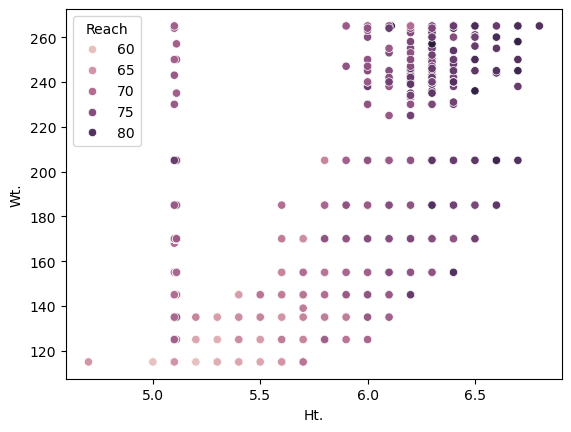

In [31]:
sns.scatterplot(data=fighters_df[~(fighters_df['Wt.']>500)],x='Ht.',y='Wt.',hue='Reach')
plt.show()

There is not a big correlation between the two variables

# Events Analysis

In [32]:
events_df = pd.read_csv(base_path('data/Events.csv'),parse_dates=['Date'])
events_df.head()

,Event_Id,Name,Date,Location
0,38e5d9dcb0fddc42,UFC Fight Night: De Ridder vs. Allen,2025-10-18,"Vancouver, British Columbia, Canada"
1,9336e86cfd4ceaa1,UFC Fight Night: Oliveira vs. Gamrot,2025-10-11,"Rio de Janeiro, Rio de Janeiro, Brazil"
2,8944a0f9b2f0ce6d,UFC 320: Ankalaev vs. Pereira 2,2025-10-04,"Las Vegas, Nevada, USA"
3,ed220e87bef0cc64,UFC Fight Night: Ulberg vs. Reyes,2025-09-27,"Perth, Western Australia, Australia"
4,5efaaf313b652dd7,UFC Fight Night: Lopes vs. Silva,2025-09-13,"San Antonio, Texas, USA"


Which year had the most events ?

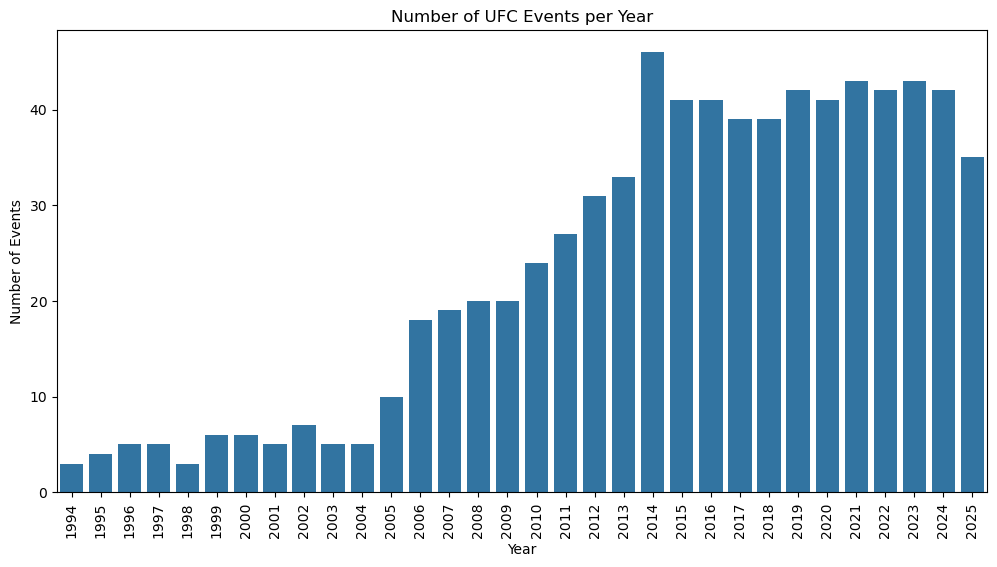

In [33]:
events_df['Year'] = events_df['Date'].dt.year

events_per_year = events_df.groupby('Year').size()

plt.figure(figsize=(12,6))
sns.barplot(x=events_per_year.index, y=events_per_year.values, color='C0')
plt.title("Number of UFC Events per Year")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Number of Events")
plt.show()

- 2014 had the most events.

Which location witnessed the most events

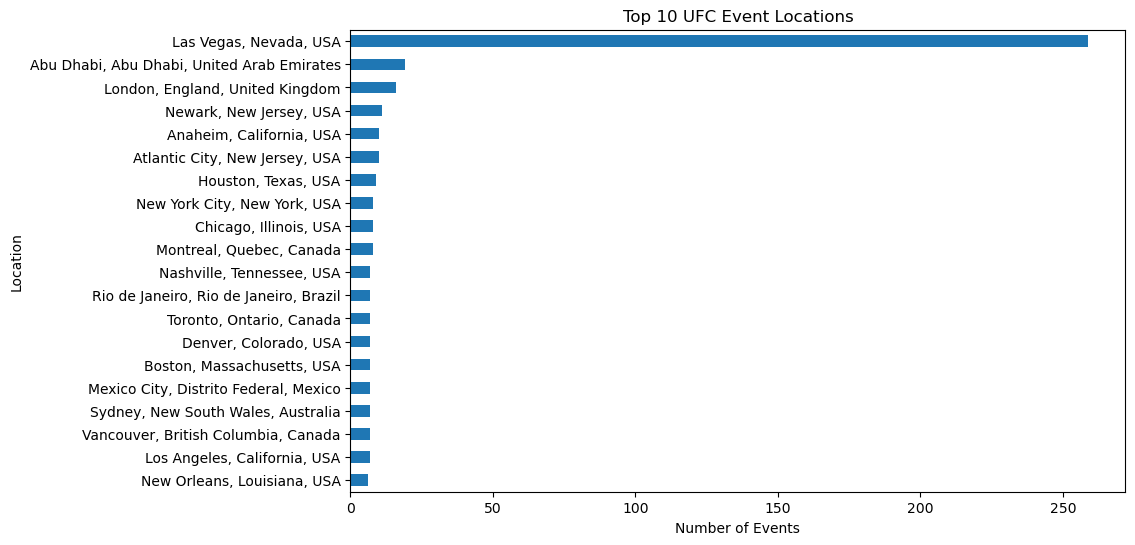

In [34]:
events_per_location = events_df['Location'].value_counts().head(20)

events_per_location.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 UFC Event Locations")
plt.xlabel("Number of Events")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

Las Vegas is by far the location with most events

# Fights Analysis

In [35]:
fights_df = pd.read_csv(base_path('data/Fights.csv'))
fights_df.head()

,Fighter_1,Fighter_2,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,SUB_1,SUB_2,...,Distance_%_1,Distance_%_2,Clinch_%_1,Clinch_%_2,Ground_%_1,Ground_%_2,Total Str._%_1,Total Str._%_2,Sig. Str._%_1,Sig. Str._%_2
0,Reinier de Ridder,Brendan Allen,0,0,22,9,1,3,1,1,...,0.60,0.12,1.00,1.00,1.00,0.7,0.85,0.72,0.69,0.59
1,Kevin Holland,Mike Malott,0,0,49,52,1,1,1,0,...,0.39,0.50,0.33,0.33,0.00,1.0,0.47,0.51,0.38,0.52
2,Marlon Vera,Aiemann Zahabi,0,1,81,56,0,0,0,0,...,0.37,0.53,0.50,0.67,0.00,0.0,0.37,0.53,0.37,0.53
3,Manon Fiorot,Jasmine Jasudavicius,0,0,16,2,0,0,0,0,...,0.50,0.14,0.00,0.00,0.89,0.0,0.61,0.14,0.59,0.14
4,Charles Jourdain,Davey Grant,1,0,25,9,0,0,1,0,...,0.55,0.35,0.00,0.00,0.67,0.0,0.58,0.35,0.58,0.35


Fight rounds distribution

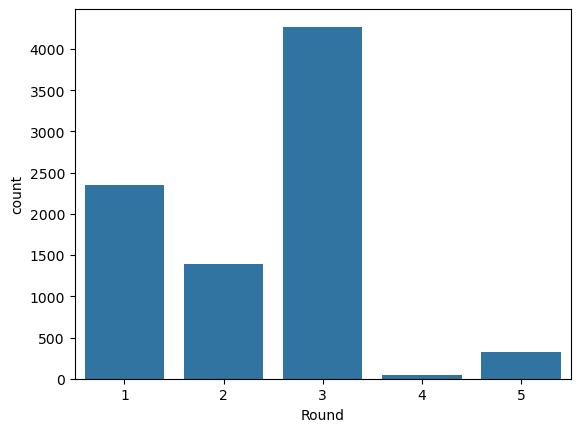

In [36]:
sns.countplot(x="Round", data=fights_df)
plt.show()

What is the most common fight ending's method?

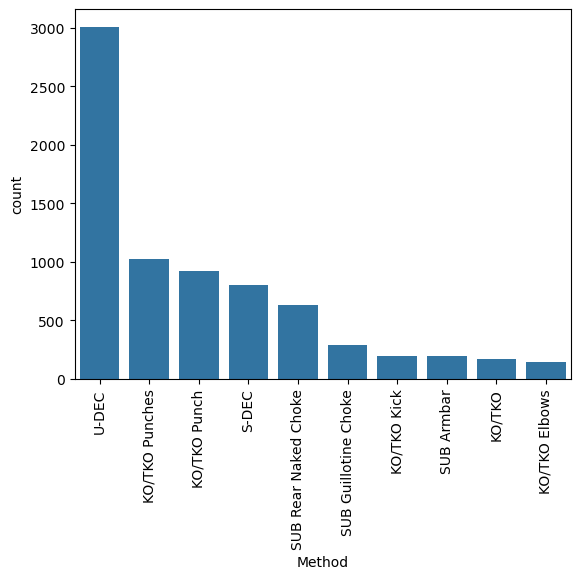

In [37]:
top_methods = fights_df['Method'].value_counts().head(10).index
sns.countplot(data=fights_df[fights_df['Method'].isin(top_methods)],
              x='Method', order=top_methods)
plt.xticks(rotation=90)
plt.show()

In [38]:
sum_of_attacks = fights_df.groupby('Weight_Class')[['KD_1','KD_2','TD_1','TD_2','SUB_1','SUB_2','STR_1','STR_2']].sum().sum(axis=1)

In [39]:
fights_per_weight_class = fights_df.groupby('Weight_Class').size()

In [40]:
(sum_of_attacks / fights_per_weight_class).sort_values(ascending=False)

Weight_Class
Women's Flyweight        106.385496
Women's Strawweight      104.760684
Women's Bantamweight      95.965812
Catch Weight              93.405405
Women's Featherweight     90.666667
Featherweight             87.772783
Bantamweight              86.758667
Flyweight                 82.239796
Lightweight               75.471045
Welterweight              74.651471
Middleweight              67.743037
Light Heavyweight         67.634247
Heavyweight               60.211306
Super Heavyweight         31.000000
Open Weight               15.450980
dtype: float64

- Women's Flyweight, Catch Weight and Featherweight Fights are probably the most enjoyable in terms of action and strikes 

- What is the average control time per weight division?

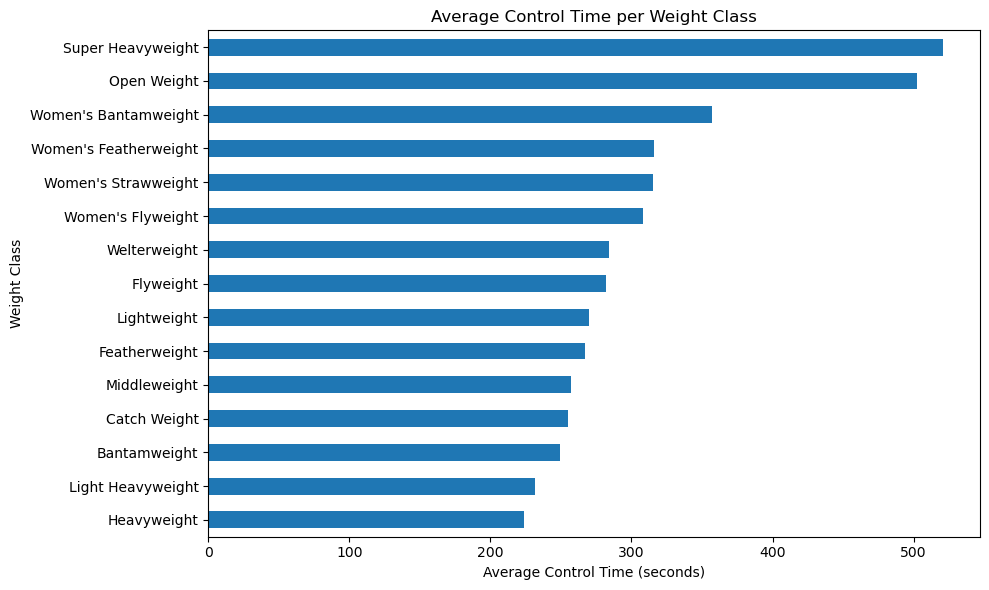

In [41]:
control_by_weight = fights_df.groupby('Weight_Class')[['Ctrl_1','Ctrl_2']].mean().sum(axis=1).sort_values(ascending=False)
control_by_weight.sort_values().plot(kind='barh', color='C0', figsize=(10, 6))
plt.title('Average Control Time per Weight Class')
plt.xlabel('Average Control Time (seconds)')
plt.ylabel('Weight Class')
plt.tight_layout()
plt.show()

HEHE ! This is almost like ranking the most boring weight divisions. Fights with higher control time are probably the ones you don't wanna watch to for entertainment.

- Which method is dominating UFC fights?

In [42]:
fights_df = pd.read_csv(base_path('data/Fights.csv'))

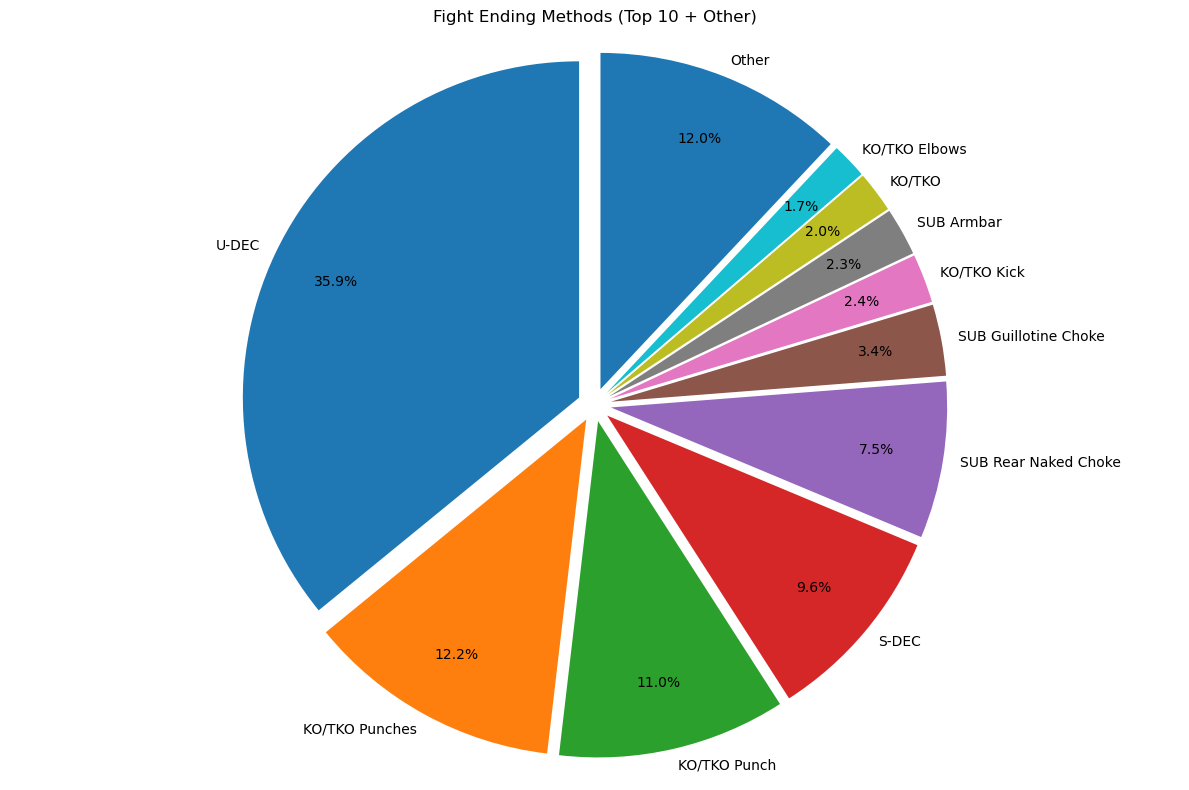

In [43]:
method_counts = fights_df['Method'].value_counts()

# Keep only top counts
top_counts = method_counts.reindex(top_methods, fill_value=0)
# Sum other count
other_count = method_counts[~method_counts.index.isin(top_methods)].sum()


labels = top_methods.tolist() + (['Other'] if other_count > 0 else [])
sizes = top_counts.values.tolist() + ([other_count] if other_count > 0 else [])

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    labeldistance=1.05,
    explode=[0.05]*11
    # wedgeprops = {'ls':'-','lw': 3,'ec':'black'}
)
ax.axis('equal')
ax.set_title('Fight Ending Methods (Top 10 + Other)')

plt.tight_layout()
plt.show()

In [44]:
print(f"Nearly {int(len(fights_df)*0.122)} of the UFC fights was ended by KO/TKO Punches")

Nearly 1022 of the UFC fights was ended by KO/TKO Punches


> For now, this is enough for **EDA**. This is an iterative process so I am gonna do much more of it when building the ML model.